<a href="https://colab.research.google.com/github/sonudk/Source-Code-from-Tutorials/blob/master/linear_regression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import pandas as pd
import sklearn

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys()) #to understand what it contains 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
#in this case target contains prices of houses for all semples
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.target[505])# it means there are 506 samples

11.9


In [8]:
# now we will load the data into pandas framework
boston_panda=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_panda.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
boston_panda['MEDV']= boston.target

In [10]:
boston_panda.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Why we did above thing and what it does ?? it is to crosscheck there remains no point with "NA" so this isnull() checks NA and sum() counts total NAs


Exploratory Data Analysis Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

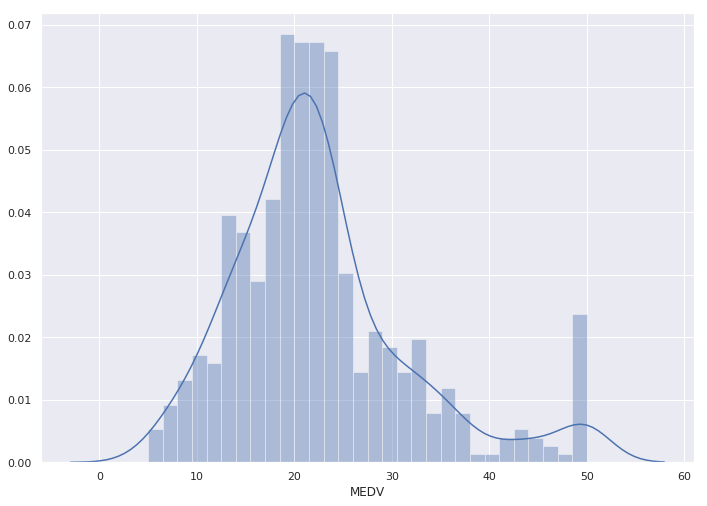

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_panda['MEDV'],bins=30)


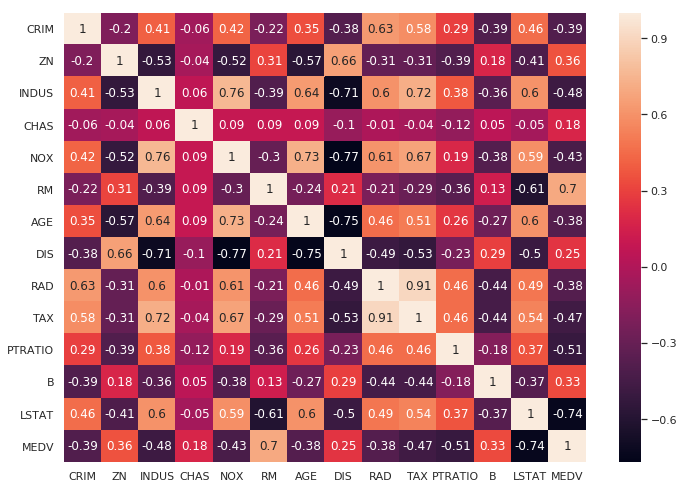

In [12]:
correlation_matrix=boston_panda.corr().round(2)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)

In [29]:
plt.figure(figsize=(20,3))

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

In [30]:
features=['LSTAT','RM']
target=boston_panda['MEDV']
print(enumerate('RM'))

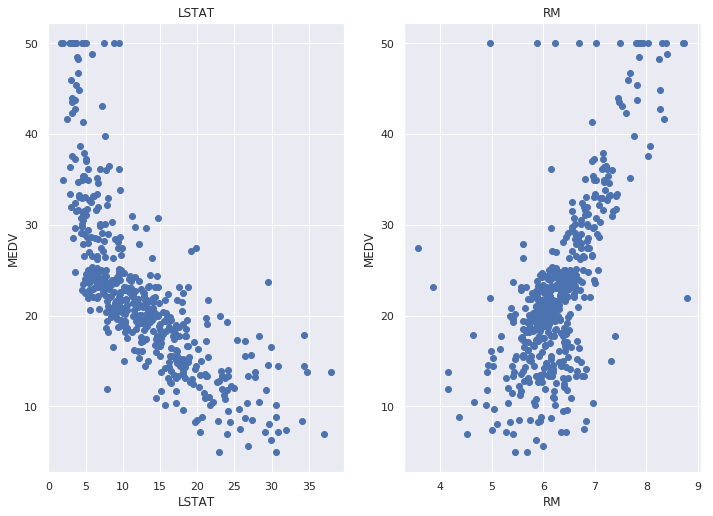

In [31]:
for i,col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x=boston_panda[col]
  y=target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [32]:
X=pd.DataFrame(np.c_[boston_panda['LSTAT'],boston_panda['RM']],columns=['LSTAT','RM'])
Y=boston_panda['MEDV']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [35]:
#train and test the MODEL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)
print("model training performance:")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")


model training performance:
RMSE is 5.6371293350711955
R2 is 0.6300745149331701




In [41]:
#testing performance
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2=r2_score(Y_test,y_test_predict)
print("model testing performance:")
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))
print("\n")


model testing performance:
RMSE is 5.137400784702911
R2 is 0.6628996975186952


